In [4]:
#!pip install webdriver-manager

In [5]:
# 블로그 검색 함수
def	blog_search(keyword):
    # 모듈설치
    import selenium
    from selenium.webdriver.chrome.service import Service
    from webdriver_manager.chrome import ChromeDriverManager
    from	bs4	import	BeautifulSoup
    import	requests
    from	itertools import count
    from	selenium import	webdriver
    from	konlpy.tag import Okt
    from	collections import Counter
    from	wordcloud import WordCloud
    import	matplotlib.pyplot as plt
    import matplotlib.font_manager as fm
    from urllib.request import urlopen
    import platform
    import pandas as pd
    import re
    okt = Okt()
    
    blog_title_text=[]
    noun_list =[]
    counts =[]
    tag =[]
    
    for i in range(1,10):
        wd	= webdriver.Chrome(service=Service(ChromeDriverManager().install()))
        main_url =f"https://section.blog.naver.com/Search/Post.naver?pageNo={i}&rangeType=ALL&orderBy=sim&keyword={keyword}" 

        wd.get(main_url)	
        
        html	=	wd.page_source
        soupData =	BeautifulSoup(html,	'html.parser')
        blog_title =	soupData.find_all('span',	{'class':'title'})
        
        for i in range(7):
            blog_title_text.append(blog_title[i].text)
        
        for data in blog_title_text:
            sentences_tag = okt.pos(data)
            # tag가 명사인 단어들만 noun_adj_list에 넣어준다.
            for word, tag in sentences_tag:
                if tag in ['Noun']:
                    if keyword in word:
                        continue
                    elif '여행' in word:
                        continue
                    else:
                        noun_list.append(word)
        wd.quit()
        
    counts	= Counter(noun_list)
    tags	= counts.most_common(30)
    
    if	platform.system()	==	'Windows':
        path	=	r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system()	==	'Darwin':		#	Mac	OS
        path	=	r'/System/Library/Fonts/AppleGothic'
    else:
        path	=	r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

    wc = WordCloud(font_path=path,	background_color='white',	width=800,	height=600, random_state = 30)
    print(dict(tags))
    cloud =	wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(12,	8))
    #plt.text(x=800, y = 300 ,s= f'<-{keyword}', color = 'black', fontsize = 30)
    #plt.title(f'[{keyword}]', size=40)
    plt.axis('off')
    plt.imshow(cloud)
    plt.show() 
    return(tags)    

{'대구': 367, '장소': 119, '페스티벌': 64, '일정': 51, '후기': 49, '치맥': 45, '동성로': 35, '라인업': 32, '정보': 29, '나들이': 29, '데이트': 29, '행사': 27, '수성': 27, '공원': 26, '인파': 26, '축제': 25, '및': 25, '벚꽃': 23, '시간': 23, '피크닉': 22, '박람회': 21, '추천': 21, '날': 20, '못': 20, '꽃': 20, '구경': 19, '관람': 19, '송해': 18, '수목원': 18, '커피': 18}


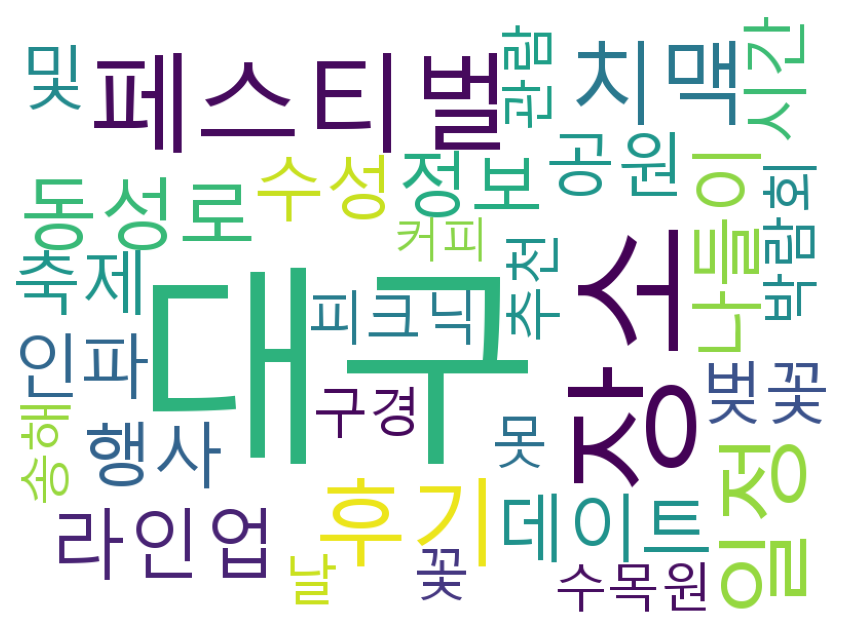

[('대구', 367),
 ('장소', 119),
 ('페스티벌', 64),
 ('일정', 51),
 ('후기', 49),
 ('치맥', 45),
 ('동성로', 35),
 ('라인업', 32),
 ('정보', 29),
 ('나들이', 29),
 ('데이트', 29),
 ('행사', 27),
 ('수성', 27),
 ('공원', 26),
 ('인파', 26),
 ('축제', 25),
 ('및', 25),
 ('벚꽃', 23),
 ('시간', 23),
 ('피크닉', 22),
 ('박람회', 21),
 ('추천', 21),
 ('날', 20),
 ('못', 20),
 ('꽃', 20),
 ('구경', 19),
 ('관람', 19),
 ('송해', 18),
 ('수목원', 18),
 ('커피', 18)]

In [17]:
blog_search('대구 인파 장소')

{'대구': 336, '핫': 321, '레이스': 314, '카페': 100, '맛집': 71, '커피': 46, '베트남': 27, '앞산': 25, '칠곡': 23, '수성구': 19, '곳': 19, '수성': 18, '못': 18, '뭄뭄': 18, '중식': 15, '메뉴': 15, '술집': 14, '베리': 14, '이색': 14, '루프': 12, '탑': 12, '교동': 12, '마루': 12, '추천': 12, '아눅': 11, '여기': 11, '삼덕동': 11, '음료': 9, '온': 9, '듯': 9}


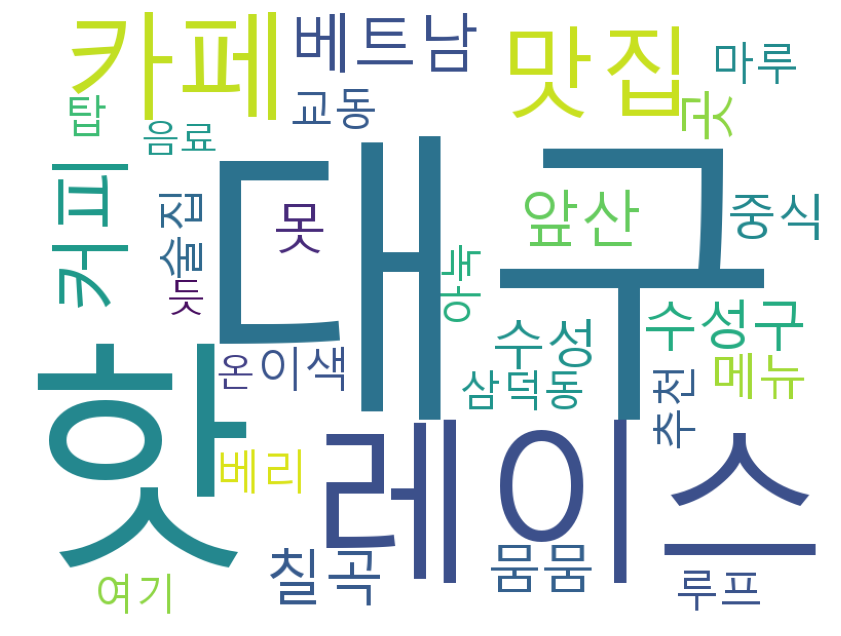

[('대구', 336),
 ('핫', 321),
 ('레이스', 314),
 ('카페', 100),
 ('맛집', 71),
 ('커피', 46),
 ('베트남', 27),
 ('앞산', 25),
 ('칠곡', 23),
 ('수성구', 19),
 ('곳', 19),
 ('수성', 18),
 ('못', 18),
 ('뭄뭄', 18),
 ('중식', 15),
 ('메뉴', 15),
 ('술집', 14),
 ('베리', 14),
 ('이색', 14),
 ('루프', 12),
 ('탑', 12),
 ('교동', 12),
 ('마루', 12),
 ('추천', 12),
 ('아눅', 11),
 ('여기', 11),
 ('삼덕동', 11),
 ('음료', 9),
 ('온', 9),
 ('듯', 9)]

In [12]:
blog_search('대구 핫플레이스')

{'인파': 300, '대구': 296, '윤석열': 78, '구름': 71, '후보': 43, '박근혜': 40, '저': 40, '시장': 35, '북적': 35, '대선': 28, '이재명': 27, '공원': 25, '동성로': 24, '부산': 24, '핼러윈': 23, '달성': 22, '유세': 21, '환영': 20, '도착': 20, '커피': 18, '상가': 18, '건물': 18, '화재': 18, '명': 18, '연기': 18, '흡입': 18, '난리': 18, '뉴스': 18, '간': 17, '카페': 15}


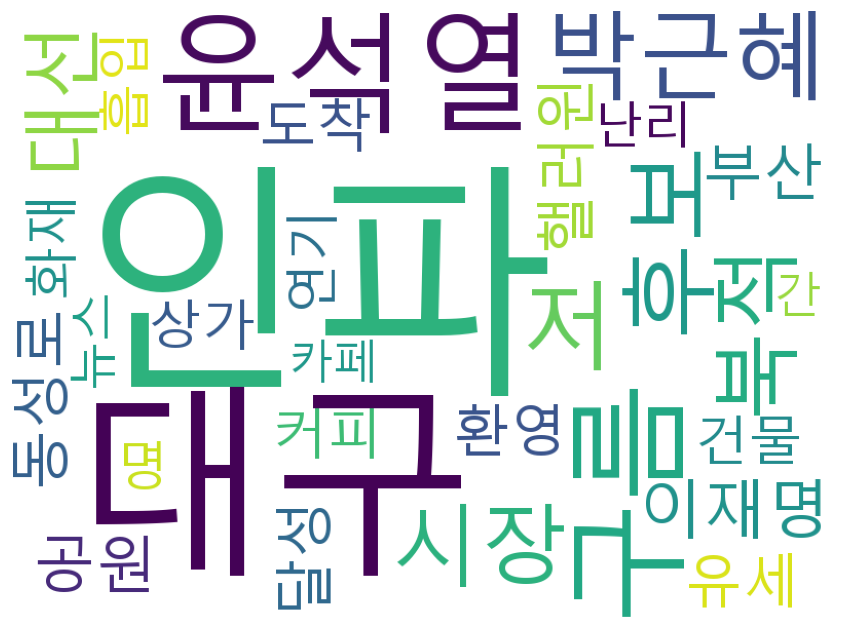

[('인파', 300),
 ('대구', 296),
 ('윤석열', 78),
 ('구름', 71),
 ('후보', 43),
 ('박근혜', 40),
 ('저', 40),
 ('시장', 35),
 ('북적', 35),
 ('대선', 28),
 ('이재명', 27),
 ('공원', 25),
 ('동성로', 24),
 ('부산', 24),
 ('핼러윈', 23),
 ('달성', 22),
 ('유세', 21),
 ('환영', 20),
 ('도착', 20),
 ('커피', 18),
 ('상가', 18),
 ('건물', 18),
 ('화재', 18),
 ('명', 18),
 ('연기', 18),
 ('흡입', 18),
 ('난리', 18),
 ('뉴스', 18),
 ('간', 17),
 ('카페', 15)]

In [14]:
blog_search('대구 인파')

{'대구': 50, '부동산': 29, '차': 26, '파동': 26, '단풍': 24, '청도': 18, '주차': 18, '서울': 17, '현대': 16, '병원': 16, '설설': 16, '지방': 16, '분양': 16, '시장': 16, '축제': 15, '명소': 15, '코스': 15, '원주': 14, '코로나': 13, '바이러스': 13, '내일': 13, '아파트': 13, '값': 13, '경쟁률': 12, '수백': 12, '길': 12, '걱정': 12, '비슬산': 12, '세부': 12, '맛집': 12}


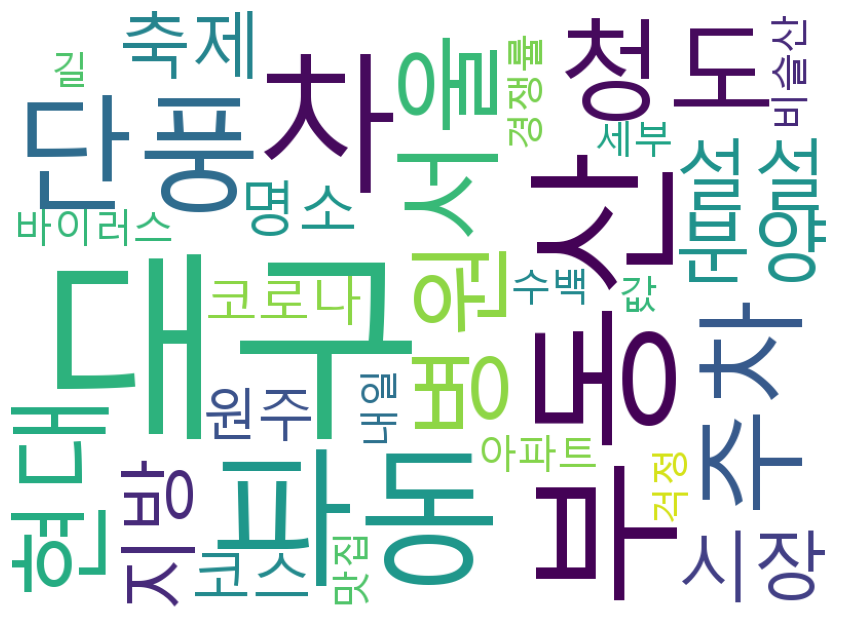

[('대구', 50),
 ('부동산', 29),
 ('차', 26),
 ('파동', 26),
 ('단풍', 24),
 ('청도', 18),
 ('주차', 18),
 ('서울', 17),
 ('현대', 16),
 ('병원', 16),
 ('설설', 16),
 ('지방', 16),
 ('분양', 16),
 ('시장', 16),
 ('축제', 15),
 ('명소', 15),
 ('코스', 15),
 ('원주', 14),
 ('코로나', 13),
 ('바이러스', 13),
 ('내일', 13),
 ('아파트', 13),
 ('값', 13),
 ('경쟁률', 12),
 ('수백', 12),
 ('길', 12),
 ('걱정', 12),
 ('비슬산', 12),
 ('세부', 12),
 ('맛집', 12)]

In [19]:
blog_search('대구 인파 몰림')

# LSTM
---

In [30]:
# 모듈 로딩
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import numpy as np
import matplotlib.pyplot as p


import random
random.seed(42)

import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')

## [1] 데이터 전처리
---

## [2] 모델 생성
---


데이터 과거단위 생성 함수

In [31]:
# [ 학습 단위 생성 함수 ]
# data = 사용할 데이터
# n = 학습할 과거 데이터 수
# --> 예측값 개수 : 전체 데이터 갯수 - n (앞쪽데이터 n개가 제외됨)

def generateX(data, n): # data, n=5(예시)
    x_train = []
    y_train = []
    for i in range(len(data)): # i = 0~9 
        x = data[i:(i + n)] # x : 0~4,1~5,2~6,3~7,4~8,5~9...9~14
        if (i + n) < len(data): # target data가 있는 범위까지만
            x_train.append(x) # x_train = 0~4,1~5,2~6,3~7,4~8까지
            y_train.append(data[i + n]) # y_train = 5,6,7,8,9
        else:
            break
    return np.array(x_train), np.array(y_train)
    # x_train 개수: date개수 - n(뒤)
    # y_train 개수: date개수 - n(앞)

In [36]:
def pred_future(DATA,WINDOW_SIZE):

    train_size = len(DATA)-(2*WINDOW_SIZE)
    test_size = len(DATA)- train_size
    
    print(f'예측 개월 수: {WINDOW_SIZE}개월')
    print('--------------------------------')

    # [ 조건 ]
    if test_size < 2*WINDOW_SIZE:
        print(f'past_learn을 {len(DATA)/2} 이하로 입력해주세요')


    # [ 과거데이터 학습 단위 설정]
    x, y = generateX(DATA, WINDOW_SIZE) 

    print('[ before reshape ]')
    print('x.shape:',x.shape)
    print('y.shape:',y.shape)
    print('--------------------------------')
    
    # 차원 하나씩 추가 -----------------------------------------------------
    x = x.reshape(-1,WINDOW_SIZE,1)
    y = y.reshape(-1,1)

    print('[ after reshape ]')
    print('x.shape:', x.shape)
    print('y.shape:', y.shape)
    print('--------------------------------')

    # [ 학습 사이즈 ] -> train, test 
    # train_size = len(DATA)-(2*WINDOW_SIZE)

    # 학습용 데이터와 시험용 데이터
    x_train = x[:train_size, :, :]
    y_train = y[:train_size, :]
    x_test = x[train_size:, :, :]
    y_test = y[train_size:, :]

    print('x_train.shape:', x_train.shape,'y_train.shape:', y_train.shape)
    print('x_test.shape :', x_test.shape, 'y_test.shape :', y_test.shape)
    print('--------------------------------')

    # 모델 구성 ---------------------------------------------------------------
    model = Sequential()
    model.add(LSTM(16, 
                input_shape=(x_train.shape[1], x_train.shape[2]), 
                activation='relu', 
                return_sequences=False)
            )

    model.add(Dense(1))
    
    # 모델 컴파일 --------------------------------------------------------------
    model.compile(loss='mean_squared_error', optimizer='adam')
    early_stop = EarlyStopping(monitor='loss', patience=10)

    history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16)
                                    # callbacks=[early_stop])
    
    y_hat = model.predict(x_test)

    # 예측 결과 시각화 ----------------------------------------------------------
    a_axis = np.arange(0, len(y_train))
    b_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

    plt.figure(figsize=(16,9)) 
    plt.plot(a_axis, y_train.reshape(x_train.shape[0],), 'o-') 
    plt.plot(b_axis, y_hat.reshape(x_test.shape[0],), 'o-', color='red', label='Predicted')
    plt.plot(b_axis, y_test.reshape(x_test.shape[0],), 'o-', color='green', alpha=0.2, label='Actual')
    plt.legend()
    plt.show()

    return y_hat

예측 개월 수: 12개월
--------------------------------
[ before reshape ]
x.shape: (288, 12)
y.shape: (288,)
--------------------------------
[ after reshape ]
x.shape: (288, 12, 1)
y.shape: (288, 1)
--------------------------------
x_train.shape: (276, 12, 1) y_train.shape: (276, 1)
x_test.shape : (12, 12, 1) y_test.shape : (12, 1)
--------------------------------
Epoch 1/200
18/18 [==============================] - 1s 3ms/step - loss: 0.8806
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6904
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 0.5163
Epoch 4/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3697
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 0.2818
Epoch 6/200
18/18 [==============================] - 0s 3ms/step - loss: 0.1903
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1483
Epoch 8/200
18/18 [==============================] - 0s 2ms/step - loss: 0.1282


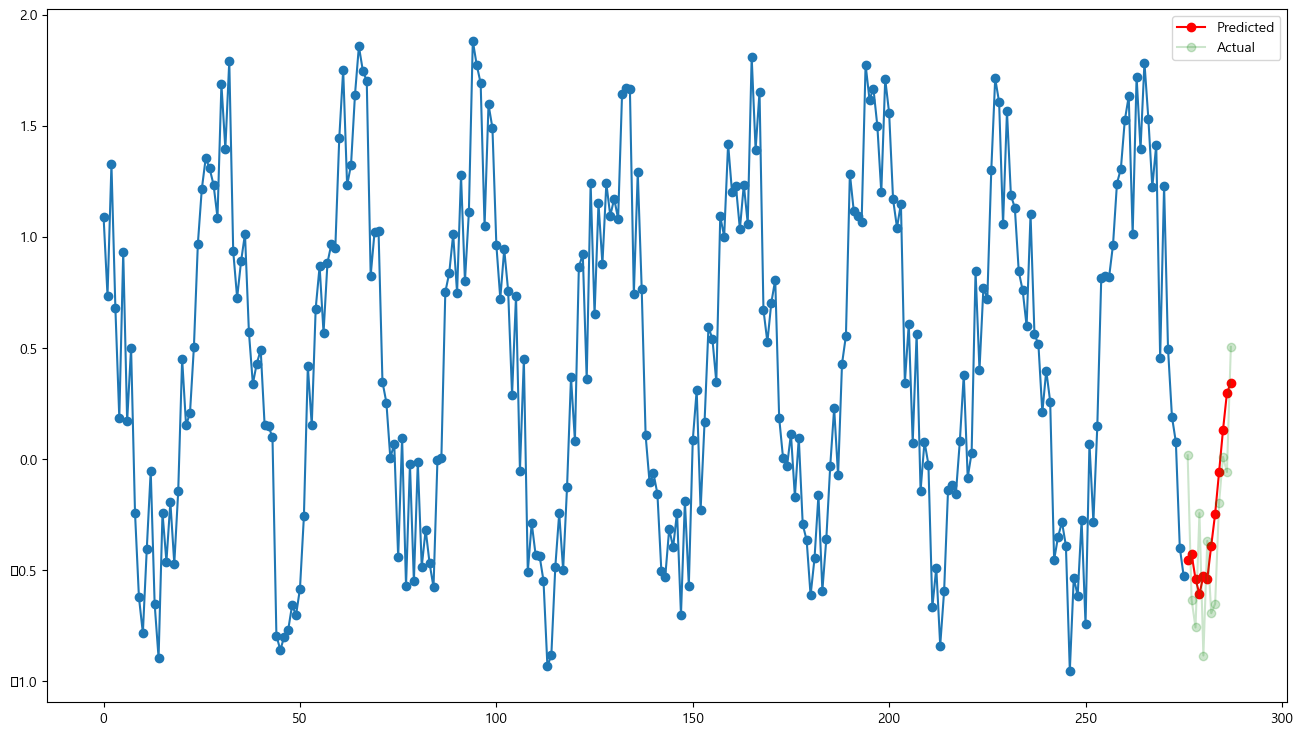

In [37]:
# 미래 예측 함수 테스트(sin 그래프)

# [ 조정 변수]

# 총 데이터
DATA = np.sin(2 * np.pi * 0.03 * np.arange(0, 300)) + np.random.random(300) # Sine 함수에 노이즈를 섞은 데이터로 학습 데이터 100개를 생성한다

# 과거 학습 단위 = 예측하게 되는 타겟 갯수
WINDOW_SIZE = 12

# past_learn: 과거 학습할 데이터 단위 
pred = pred_future(DATA,WINDOW_SIZE)